### Supervised Learning: Simple Iris Classification (Logistic Regression)


In [1]:
%pip install -q scikit-learn matplotlib pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
def simple_iris_classification():
    
    print("Simple Iris Classification Example")
    print("=" * 40)
    print()
    
    # Step 1: Load the data
    print("Step 1: Loading the data...")
    data_path = "/Users/vignesh/Documents/GitHub/Generative_ai/Datasets/neural_networks/Iris.csv"
    data = pd.read_csv(data_path)
    
    print(f" Loaded {len(data)} flower samples")
    print(f"   Features: {list(data.columns[1:-1])}")  # Skip 'Id' and 'Species'
    print(f"   Species: {data['Species'].unique()}")
    print()
    
    # Step 2: Prepare the data
    print("Step 2: Preparing the data...")
    
    # Select features (X) and target (y)
    features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    X = data[features]
    y = data['Species']
    
    print(f" Features shape: {X.shape}")
    print(f" Target shape: {y.shape}")
    print()
    
    # Step 3: Split the data
    print("Step 3: Splitting data into training and testing sets...")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    print(f" Training set: {len(X_train)} samples")
    print(f" Testing set: {len(X_test)} samples")
    print()
    
    # Step 4: Train the model
    print("Step 4: Training the Logistic Regression model...")
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    print(" Model trained successfully!")
    print()
    
    # Step 5: Make predictions
    print("Step 5: Making predictions on test data...")
    
    y_pred = model.predict(X_test)
    
    print(" Predictions completed!")
    print()
    
    # Step 6: Evaluate the model
    print("Step 6: Evaluating model performance...")
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f" Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print()
    
    # Step 7: Show some example predictions
    print("Step 7: Example predictions...")
    print("-" * 30)
    
    for i in range(5):
        actual = y_test.iloc[i]
        predicted = y_pred[i]
        features_str = ", ".join([f"{X_test.iloc[i][col]:.1f}" for col in features])
        
        status = "" if actual == predicted else ""
        print(f"Sample {i+1}: {status}")
        print(f"  Features: [{features_str}]")
        print(f"  Actual: {actual}")
        print(f"  Predicted: {predicted}")
        print()
    
    # Step 8: Make a prediction on new data
    print("Step 8: Predicting a new flower...")
    print("-" * 30)
    
    # Example: A flower with measurements [5.1, 3.5, 1.4, 0.2]
    new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=features)
    prediction = model.predict(new_flower)[0]
    probability = model.predict_proba(new_flower)[0]
    
    print("New flower measurements:")
    for feature in features:
        print(f"  {feature}: {new_flower.iloc[0][feature]}")
    print()
    print(f"Predicted species: {prediction}")
    print()
    print("Prediction probabilities:")
    for i, species in enumerate(model.classes_):
        print(f"  {species}: {probability[i]:.4f} ({probability[i]*100:.2f}%)")
    print()
    
    print("🎉 Simple example completed!")
    print("=" * 40)
    print("Key takeaways:")
    print("1. Load data → Prepare features → Split data")
    print("2. Train model → Make predictions → Evaluate")
    print("3. Supervised learning uses labeled examples")
    print("4. We can predict new, unseen data!")
    print()


In [4]:
def create_simple_visualization():
    """
    Create a simple visualization to understand the data.
    """
    print(" Creating simple visualization...")
    
    # Load data
    data_path = "/Users/vignesh/Documents/GitHub/Generative_ai/Datasets/neural_networks/Iris.csv"
    data = pd.read_csv(data_path)
    
    # Create a simple scatter plot
    plt.figure(figsize=(10, 6))
    
    # Plot each species with different colors
    species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
    
    for species in data['Species'].unique():
        species_data = data[data['Species'] == species]
        plt.scatter(species_data['PetalLengthCm'], species_data['PetalWidthCm'], 
                   c=species_colors[species], label=species, alpha=0.7, s=50)
    
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Iris Species Classification\n(Petal Length vs Petal Width)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Save the plot
    plt.savefig('/Users/vignesh/Documents/GitHub/Generative_ai/Machine Learning/simple_iris_plot.png', 
               dpi=300, bbox_inches='tight')
    plt.show()
    
    print(" Simple plot saved as 'simple_iris_plot.png'")
    print()


Simple Iris Classification Example

Step 1: Loading the data...
 Loaded 150 flower samples
   Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
   Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Step 2: Preparing the data...
 Features shape: (150, 4)
 Target shape: (150,)

Step 3: Splitting data into training and testing sets...
 Training set: 105 samples
 Testing set: 45 samples

Step 4: Training the Logistic Regression model...
 Model trained successfully!

Step 5: Making predictions on test data...
 Predictions completed!

Step 6: Evaluating model performance...
 Model Accuracy: 1.0000 (100.00%)

Step 7: Example predictions...
------------------------------
Sample 1: 
  Features: [6.1, 2.8, 4.7, 1.2]
  Actual: Iris-versicolor
  Predicted: Iris-versicolor

Sample 2: 
  Features: [5.7, 3.8, 1.7, 0.3]
  Actual: Iris-setosa
  Predicted: Iris-setosa

Sample 3: 
  Features: [7.7, 2.6, 6.9, 2.3]
  Actual: Iris-virginica
  Predicted: Iris-virginica

S

/Users/vignesh/anaconda3/envs/bertenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/vignesh/anaconda3/envs/bertenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


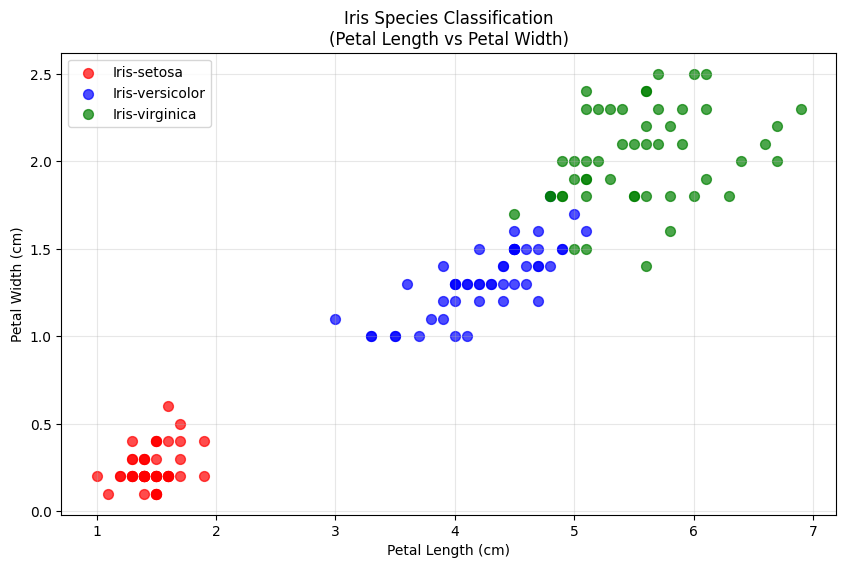

 Simple plot saved as 'simple_iris_plot.png'



In [5]:
# Run the simple example and visualization
simple_iris_classification()
create_simple_visualization()
